# Clean And Analyze Employee Exit Surveys

We will take a look on employee exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

Our aim is to answer on following questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We'll work on combined 2 data sets (**dete_survey.csv** and **tafe_survey.csv**) to try answer on questions above.

A data dictionary wasn't provided with the dataset. For this project, we'll use our general knowledge to define couple columns.

### dete_survey.csv

| Column name | Description |
| :- |-------------: |
| **ID** |  An id used to identify the participant of the survey |
| **SeparationType** | The reason why the person's employment ended |
| **Cease Date** | The year or month the person's employment ended |
| **DETE Start Date** | The year the person began employment with the DETE |

### tafe_survey.csv

| Column name | Description |
| :- |-------------: |
| **Record ID** |  An id used to identify the participant of the survey |
| **Reason for ceasing employment** | The reason why the person's employment ended |
| **LengthofServiceOverall. Overall Length of Service at Institute (in years)** | The length of the person's employment (in years) |

## Data sets
You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). 


## Opening files
Let's start with opening data sets and take first look at both of them.

In [1]:
#import pandas liblary
import pandas as pd

pd.options.display.max_columns = 150 # to avoid truncated output 

#opening dete_survey.csv file
dete_survey = pd.read_csv('dete_survey.csv', encoding='UTF-8')
#opening tafe_survey.csv file
tafe_survey = pd.read_csv('tafe_survey.csv', encoding='UTF-8')

In [2]:
#display info about dete_survey columns
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

Dete_survey data set contains with 822 rows and 56 columns. Only the first column **ID** has numeric values, the rest are object or bool type. Some of columns have many missing values, like **Torres Strait** and **South Sea**. We have to examine  columns more closely.

In [3]:
#display first 5 rows in dete_survey
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
#display info about tafe_survey columns
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [5]:
#display first 5 rows in tafe_survey
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [6]:
#display Nan values in tafe_survey
tafe_survey.isnull().sum().sort_values(ascending=False)

Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Ill Health                                 265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Career Move - Public Sector                265
                                                                ... 
CESSATION YEAR                                                     7
Reason for ceasing employment                                      1
WorkArea                                                           0
Institute                                                          0
Record ID                                                          0
Length: 72, dtype: int64

First look at both data sets, give us following observations:
* Many columns in both data sets contains Nan values,
* Some columns in date_survey have `'Not Stated'` values which indicate values are missing, but they aren't represented as `NaN`,
* Also in tafe_survey columns many values are as `'-'` character and they are not marked as `NaN` values,
* There are many of same columns in both data set, but column names are different.


## Identify Missing Values and Drop Unnecessary Columns

We will read our data set again, but this time we'll add `na_values` parameter.

In [7]:
#opening dete_survey with na_values parameter. 'Not Stated' values are treated as NaN now'
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

We will remove some columns, because many of them will not have big influence on our goals. We will focous on these columns which contains similar factors in both data sets.

In [8]:
#delete columns which we won't use in analysys in dete_survey
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
#delete columns which we won't use in analysys in tafe_survey
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [9]:
#check updated dete_survey columns
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

Our `dete_survey` data set contains 35 columns now and almost half of them are bool type.

In [10]:
#check updated tafe_survey columns
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

`tafe_survey` data set has 23 columns after change.

## Clean Column Names

As we mentioned above, both data sets have similar contributing factors, but column names are different. We'll change their names to combaine date sets.

First, we will do standardize the column names in `dete_survey_updated`.

In [11]:
#standardization column names in dete_survey_updated
dete_survey_updated.columns = (dete_survey_updated.columns.str.lower() #lowercase capitalization
                                                          .str.strip() #Remove any trailing whitespace from the end of the strings.
                                                          .str.replace(' ','_') #Replace spaces with underscores ('_')
                              )
#display columns after standardization in dete_survey_updated
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Next, we'll change some column names in `tafe_survey_updated`. We could noticed that many column names are written as whole question from survey and they're too long.

In [12]:
#changing column names in tafe_survey_updated
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID': 'id',
                                    'CESSATION YEAR': 'cease_date',
                                    'Reason for ceasing employment': 'separationtype',
                                    'Gender. What is your Gender?': 'gender',
                                    'CurrentAge. Current Age': 'age',
                                    'Employment Type. Employment Type': 'employment_status',
                                    'Classification. Classification': 'position',
                                    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',              
                                    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
                                     })
                                                         
#display columns after renaming in tafe_survey_updated
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Filter the data

Let's check `separationtype` column in both data set

In [13]:
#checking unique values in dete_survey_updated
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
#checking unique values in tafe_survey_updated
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

We see that there are 3 types of Resignation in `dete_survey_updated`. In `tafe_survey_updated` there is one value with resigantion.

To work easier with both data sets we will treat these 3 types of Resignation in  `dete_survey_updated` as one value - `Resignation`.

In [15]:
#convert all values which contains world Resignation in one value
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str.get(0)

In [16]:
#display values in separationtype column in dete_survey_updated after changes
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

After changes, we can select only the data for survey respondents who have a Resignation separation type in both data sets.

In [17]:
#selecting rows with Resignation value in separationtype column for each DataFrame
#make copy to avoid SettingWithCopy Warning
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy() 
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()                

## Verify the data

Let's look at `cease_date` and `dete_start_date` columns to verify if the years look reliably.

First, we have to convert values to float in `dete_resignations` dataframe. 

In [18]:
#check unique values
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2012      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

Many values contain also number of mounth, we can remove them at leave only year.

In [19]:
#convering cease_date column to float
dete_resignations['cease_date'] = (dete_resignations['cease_date'].str.split('/') #split by character '/'
                                                                  .str.get(-1) #get last item in each value
                                                                  .astype(float) #convert to float
                                )

In [20]:
#sort unique values in cease_date column
dete_resignations_end_sorted = dete_resignations['cease_date'].value_counts().sort_index(ascending = False)
#check values after converting
dete_resignations_end_sorted  

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [21]:
#sort unique values in dete_start_date column
dete_resignations_start_sorted = dete_resignations['dete_start_date'].value_counts().sort_index(ascending = False)
dete_resignations_start_sorted

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [22]:
#sort unique values in cease_date column
tafe_resignations['cease_date'].value_counts().sort_index(ascending = False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

In [23]:
#plot values of cease_date column in tafe_resignations
tafe_resignations.boxplot(column=['cease_date'])


In [24]:
#plot values of cease_date column in dete_resignations
dete_resignations.boxplot(column=['cease_date'])

We compared `cease_date` column in both Dataframes. All values seem to be real.

However, we see that some values are not a equal. For example, in `tafe_resignations` there are some values with 2009 year and there not in `dete_resignations`. Most popular resigantion year is 2013 in `dete_resignations` and 2011 in `tafe_resignations`.

## Create New Column with period of employment

One of our goal, as a remainder is:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

To ask on question above, we need an information about period of employment. In `tafe_resignations` column with these values already exist.

Let' calculate the period of service each  employee in `dete_resignations`. We have 2 columns here: `dete_start_date` and `cease_date`. They contain floats so we have to only substract them.

Let's first check if dates are real. Period of employment can't be a negative value, so we will check if any value in `dete_start_date` column is bigger than `cease_date` column.

In [25]:
#compare values in cease_date column with dete_start_date column
dete_resignations[dete_resignations.cease_date < dete_resignations.dete_start_date].copy()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb


All look ok, so we can calculate period of employment.

In [26]:
#Subtracting values in cease_date column from cease_date and create new column -> institute_service
dete_resignations['institute_service'] = dete_resignations.cease_date - dete_resignations.dete_start_date
#display 5 first rows
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


## Identify Dissatisfied Employees

Now, we will identify dissatisfied employees. To do this, we have chosen following columns, which in our opinion most contributes to dissatisfaction:

### tafe_resignations:
* Contributing Factors. Dissatisfaction,
* Contributing Factors. Job Dissatisfaction.

### dete_resignations:
* job_dissatisfaction,
* dissatisfaction_with_the_department,
* physical_work_environment,
* lack_of_recognition,
* lack_of_job_security,
* work_location,
* employment_conditions,
* work_life_balance,
* workload.

First, we'll look at `tafe_resignations` DataFrame.

In [27]:
# check unique values in Contributing Factors. Dissatisfaction column
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False) #set dropna parameter to see NaN values

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [28]:
# check unique values in Contributing Factors. Job Dissatisfaction
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False) #set dropna parameter to see NaN values

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

There are only 2 values in both columns. One: `'-'` character, which means **False** and second values is the same like column name, so it means that this is **True**. There are also few `NaN` values.

We are going to create a new column with marking if employee's resigantion is due to any kind of dissatisfaction.

First, we have to make a function to convert values on `True` or `False`.

In [29]:
#import numpy liblary to use NaN values
import numpy as np

#creating update_vals function
def update_vals(value):
    if pd.isnull(value):
        return np.nan  ##use NaN values
    elif value == '-':
        return False
    else:
        return True

Our created funcation is ready to apply. We can simply convert values to bool type. Next, we can use `df.any()` function. If any column in `tafe_resignations` (we chosen columns above) will has a `True` value the row in `dissatisfied` column will be  True also. If all values are `False`, then it means that the resigantion is not due to dissatisfaction and it is marked aas False. `NaN` values will remain unchanged.

In [30]:
tafe_resignations['dissatisfied'] = (tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]
                                     .applymap(update_vals) #apply function update_vals
                                     .any(axis=1, skipna=False) #set row in dissatisfied column (True, False or NaN (skipna parameter))
                                    )
tafe_resignations_up =  tafe_resignations.copy() #make copy to avoid SettingWithCopy Warning
#dispaly values in dissatisfied column
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [31]:
#show columns in dete_resignations
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

All columns which we have chosen to our analysy are bool type, so only we have to do is creat also new column `dissatisfied` in `dete_resignations` and use `df.any()`.

In [32]:
#create dissatisfied column and apply True, False or NaN value to each row
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)

dete_resignations_up = dete_resignations.copy() #make copy to avoid SettingWithCopy Warning

#dispaly values in dissatisfied column
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [33]:
tafe_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

## Combine the Data

It's time to combine both DataFrames. First, we will add new column `institute` with `DATE` value for `dete_resignations_up` and `TAFE` for `tafe_resignations_up`. We'll know which row come from which DataFrame.

In [34]:
dete_resignations_up['institute'] = 'DATE' #create new column and add DATE value to each row
tafe_resignations_up['institute'] = 'TAFE' #create new column and add TAFE value to each row

#combining DataFrames with pd.concat
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True) #set ignore_index on True to sort out indexes
#check columns in combined
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

There are many columns which we don't need in our analysys, so we we will drop columns which contain les than 500 non null values.

In [35]:
#check which columns have less than 500 no null values
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [36]:
#droping columns with less than 500 no null values
combined_updated = combined.dropna(axis=1, thresh=500).copy() #make copy to avoid SettingWithCopy Warning

combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DATE
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DATE
2,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DATE
3,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DATE
4,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DATE


## Clean the Service Column

We'll check all values in `institute_service` column if there any tricky values.

In [37]:
#checking all values in institute_service column 
combined_updated['institute_service'].value_counts(dropna=False) #check also NaN values

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
10.0                   6
14.0                   6
18.0                   5
16.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
21.0                   3
32.0                   3
19.0                   3
36.0                   2
30.0                   2
26.0                   2
28.0                   2
25.0                   2


Most values are ok, but some of them are written in range, like `1-2`. There are also 2 values with some words, `More than 20 years` and `Less than 1 year`. 

We have to convert all values to get one numeric value which will indicates on peroid of employment.

We'll group all values on four categories:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

This modification help us with our analysys. Moreover, problem with choosing number of years goes away, because we can chose the first number from the range.

For example, for range:

`7-10`

We'll choose `7`.

In [38]:
#extract only numbers from string and then convert it to float
combined_updated['institute_service'] = (combined_updated['institute_service'].astype(str)
                                      .str.extract('(\d+)')
                                      .astype(float))
#check all values in institute_service column after converting                                        
combined_updated['institute_service'].value_counts(dropna=False)       

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

As we mentioned above, we will divide values from `institute_service` column info four categories.

We'll create a function to compare each value and add category each of them.

In [39]:
#creating function set_category
def set_category(value):
    if value < 3:
        return 'New'
    elif value >= 3 and value <= 6:
        return 'Experienced'
    elif value > 6 and value <=10:
        return 'Established'
    elif pd.isnull(value):
        return np.nan  #return NaN value if it was NaN
    else:
        return 'Veteran'
#create new column service_cat and add category for each row
combined_updated['service_cat'] = combined_updated['institute_service'].apply(set_category)
#check values after change
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Perform Initial Analysis

We can start do our initial analysys. Let's first check all values in `dissatisfied` column.

In [40]:
#checking all values in dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False) #check also NaN values

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We noticed that most values are **False**, almost 60% more than **True** values. There are also 8 `NaN` values. We'll replace them on **False**.

In [41]:
#replacing all missing values with False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

#check all values in dissatisfied column after replacing
combined_updated['dissatisfied'].value_counts(dropna=False) #check also NaN values

False    411
True     240
Name: dissatisfied, dtype: int64

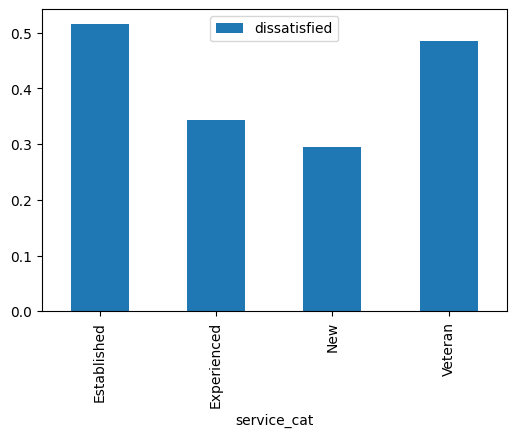

In [42]:
#create pivot table to calcualte percentage of dissatisfied employee in each group
dissatisfied_perc = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

#display plot in Jupyter 
%matplotlib inline 
#create bar plot 
dissatisfied_perc.plot(kind='bar')

As we can see, the most employees whose resignaed due to dissatisfaction are from group `Established` (7-10 years at a company) and `Veteran` (11 or more years at a company). We can say that every second person who leave job, because they were dissatisfied has 7 years exeprience or more.



## Clean the Age column

Let's check also age of each employee who letf the job due to dissatisfaction.

In [43]:
#check all values in age column
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
26  30           32
36  40           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

As we can see, we have many ranges with age. We decaided to divide all employees on 8 categories:

* 18 - 25 
* 26 - 30
* 31 - 35
* 36 - 40
* 41 - 45
* 46 - 50
* 51 - 55
* 56 and more

In [44]:
#convering values in age column to float
combined_updated['age'] = (combined_updated['age'].astype(str)
                                                  .str.extract('(\d+)')
                                                .astype(float)
                          )
#see new values after change 
combined_updated['age'].value_counts(dropna=False) #display NaN values also

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

Now, we can creat function to assign each age to each range. 

In [45]:
#creating set_age function
def set_age(value):
    if value < 25:
        return '18 - 25'
    elif value >= 26 and value <= 30:
        return '26 - 30'
    elif value >= 31 and value <= 35:
        return '31 - 35'
    elif value >= 36 and value <= 40:
        return '36 - 40'
    elif value >= 41 and value <= 45:
        return '41 - 45'
    elif value >= 46 and value <= 50:
        return '46 - 45'
    elif value >= 51 and value <= 55:
        return '51 - 55'
    elif value >= 56:
        return '56 and more'
    elif pd.isnull(value):  #return NaN
        return np.nan    

In [46]:
#create new column and apply each value 
combined_updated['age_range'] = combined_updated['age'].apply(set_age)

#see new values in age_range column after change
combined_updated['age_range'].value_counts(dropna=False).sort_index()

18 - 25        72
26 - 30        67
31 - 35        61
36 - 40        73
41 - 45        93
46 - 45        81
51 - 55        71
56 and more    78
NaN            55
Name: age_range, dtype: int64

In [47]:
#create pivot table 
pv_age = pd.pivot_table(combined_updated, index='age_range', values='dissatisfied')
pv_age

,dissatisfied
age_range,
18 - 25,0.291667
26 - 30,0.417910
31 - 35,0.377049
36 - 40,0.342466
41 - 45,0.376344
46 - 45,0.382716
51 - 55,0.422535
56 and more,0.423077


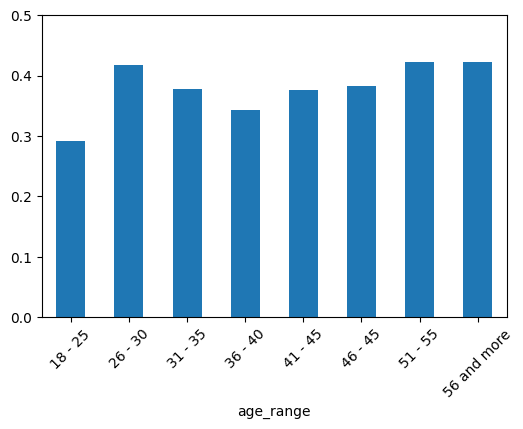

In [48]:
#create plot
pv_age.plot(kind='bar', rot=45, ylim=(0,0.5), legend=False)

As we can noticed, most often employees who left the job due to dissatisfaction are in 3 age ranges: 

* 26 - 30
* 51 - 55
* 56 and more

Let's create a plot for each group of service to check what is most common age range of dissatisfied employees.

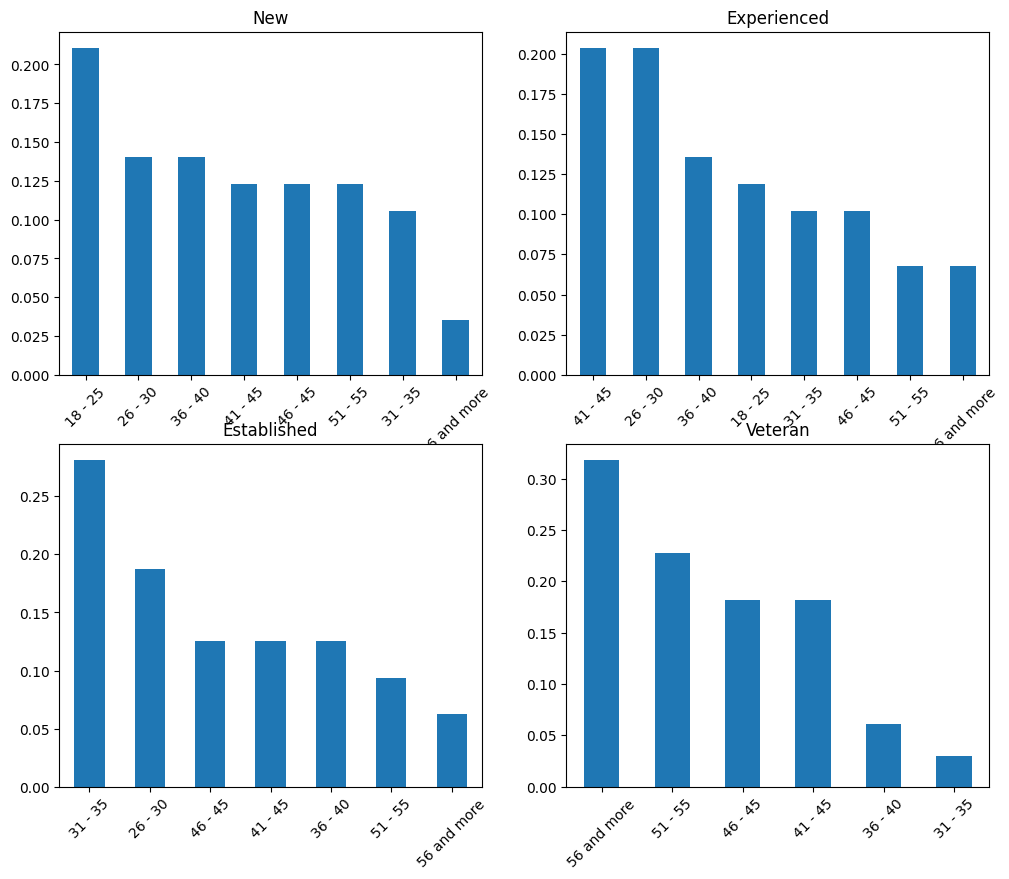

In [49]:
#import matplotlib liblary
import matplotlib.pyplot as plt

#creating plots
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
(combined_updated[(combined_updated['service_cat'] == 'New') & (combined_updated['dissatisfied'] == True)]['age_range'].value_counts(normalize=True)).plot(kind='bar', rot=45)
plt.title('New')

plt.subplot(2,2,2)
(combined_updated[(combined_updated['service_cat'] == 'Experienced') & (combined_updated['dissatisfied'] == True)]['age_range'].value_counts(normalize=True)).plot(kind='bar', rot=45)
plt.title('Experienced')

plt.subplot(2,2,3)
(combined_updated[(combined_updated['service_cat'] == 'Established') & (combined_updated['dissatisfied'] == True)]['age_range'].value_counts(normalize=True)).plot(kind='bar', rot=45)
plt.title('Established')

plt.subplot(2,2,4)
(combined_updated[(combined_updated['service_cat'] == 'Veteran') & (combined_updated['dissatisfied'] == True)]['age_range'].value_counts(normalize=True)).plot(kind='bar', rot=45)
plt.title('Veteran')

plt.show()


We can noticed some observations:

* In `New` category every fifth person who left job and was dissatisfied has from 18 till 25 years.
* 30% all veterans who lef job due to dissatisfaction have more than 56 years. 

Let's ask on one more question:

* Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [50]:
#creat pivot table 
pv_institute = combined_updated.pivot_table(index = 'institute', values = 'dissatisfied')
pv_institute

,dissatisfied
institute,
DATE,0.479100
TAFE,0.267647


## Conclusion

Let's summarize our analysys. We're ready on answer following questions:

* **Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**

As we can see, the most employees whose resignaed due to dissatisfaction are from group `Established` (7-10 years at a company) and `Veteran` (11 or more years at a company). We can say that every second person who leave job, because they were dissatisfied has 7 years exeprience or more.


* **Are younger employees resigning due to some kind of dissatisfaction? What about older employees?**

Dissatisfied employees, most often letf the job due to some kind of dissatisfaction in age 51 or older and in age 26-30 . In each of gropu, more than 40% employees letf the job who are not be satisfied. Whereas, less than 30% of people in age 18-25 leave job due to dissatisfaction.

During whole analysys we also found that:
* Employees in `DETE` survey end their employment almost twice as much as employees from `TAFE` survey.
* In `New` category every fifth person who left job and was dissatisfied has from 18 till 25 years.
* 30% all veterans who lef job due to dissatisfaction have more than 56 years. 